#### (Deep) Reconstruction

In [1]:
import time
import numpy as np
import nexpy as nxp

In [9]:
# SECTION : SUBSECTION
    # (markdown introduction)
    # METHODS : DESCRIPTION
    # PARAMETERS : DESCRIPTION
    # COMPUTATIONS : DESCRIPTION
    # OUTPUTS : DESCRIPTION

#### (Deep) Reconstruction : Access Lagrange to Newton Transformation

$\rightarrow$ This transformation is a Newton interpolation matrix. <br/>
$\rightarrow$ We name it the "Fast Newton Transformation" due to its efficiency.

In [10]:
# Parameters : m, n and p

spatial_dimension = 4
poly_degree = 6
p_degree = 2.0

In [11]:
# Computations : Newton interpolation matrix via the fast newton polynomial

l2n = nxp.FastNewtonPolynomial(
    spatial_dimension = spatial_dimension,
    poly_degree = poly_degree,
    p_degree = p_degree).l2n

#### (Deep) Reconstruction : Reconstruct Lagrange to Newton Transformation

$\rightarrow$ The original matrix is reconstructed from the $L$-factorisation chain of the underlying interpolation matrix.

In [12]:
# Parameters : max_depth

max_depth = len(l2n.tree)

In [13]:
# Method : Deep reconstruction

def ltfbm_deep_reconstruct(ltfbm : nxp.core.triangular.LowerTriangularFactorisedBlockMatrix, depth = np.infty):
    start = time.time()
    res = ltfbm.reconstruct(
        max_depth = depth)
    
    return res, f'time={np.round((time.time()-start)*10**5)/10**2}ms'

In [14]:
# Computations : Deep reconstruction with varying max_depth parameter

Xs_deep = []
Xs_str_deep = []

for depth in range(1, max_depth + 1):
    cur, cur_str = ltfbm_deep_reconstruct(l2n, depth = max_depth - depth)
    Xs_deep.append(cur.reconstruct())
    Xs_str_deep.append(cur_str)

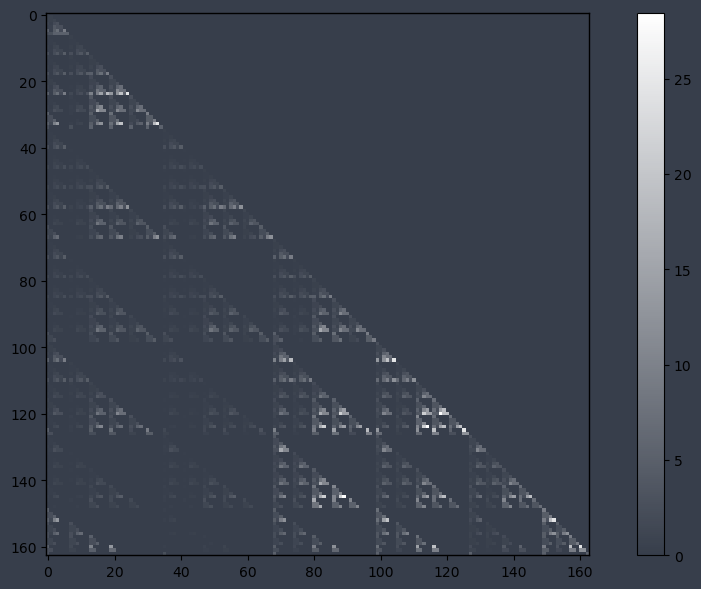

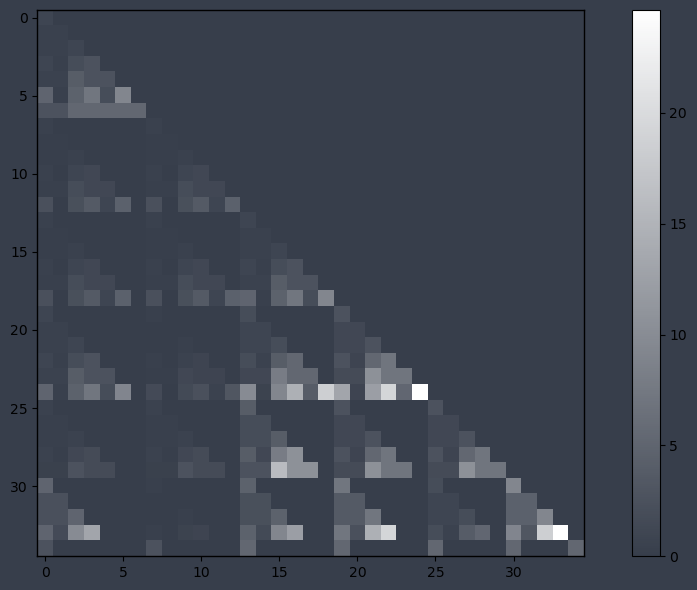

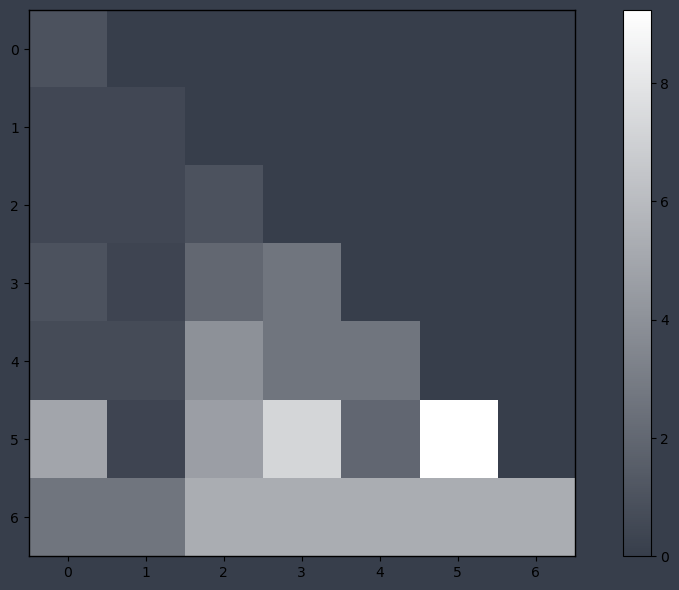

In [15]:
# Outputs : Deep reconstruction in depths 3, 2, 1, 0

for mat in Xs_deep:
    
    nxp.visual.plot.big_matrix(mat, display_colorbar = True, dark_mode = True)